In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import random

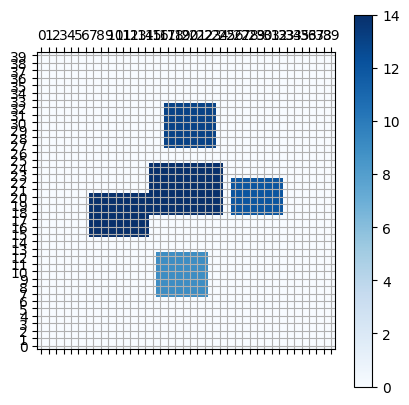

In [10]:
# visualise first ground truth file
matrix = np.loadtxt('../data/training_ground_truth_files/0_ground', usecols=range(40))

plt.matshow(matrix, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

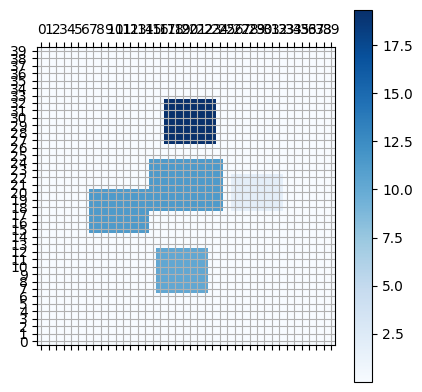

In [11]:
materials  = pd.read_csv('../data/materials.csv', header=None)

# create dictionary of materials where key is material id - second column and value is density - fourth column
materials_dict = dict(zip(materials[1], materials[3]))

# transform matrix to density matrix
matrix = np.vectorize(materials_dict.get)(matrix)

plt.matshow(matrix, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

In [12]:
# create new column in materials called radiation_length equal to fith column / fourth column

materials['radiation_length'] = materials[4] / materials[3]

# print materials  
print(materials)

           0   1     2          3      4  radiation_length
0        AIR   0   NaN   0.001205  36.62      30390.041494
1         Mg   1  12.0   1.740000  25.03         14.385057
2         Al   2  13.0   2.699000  24.01          8.895887
3         Si   3  14.0   2.329000  21.82          9.368828
4          S   4  16.0   2.000000  19.50          9.750000
5         Ca   5  20.0   1.550000  16.14         10.412903
6         Mn   6  25.0   7.440000  14.64          1.967742
7         Fe   7  26.0   7.874000  13.84          1.757684
8         Ni   8  28.0   8.902000  12.68          1.424399
9         Mo   9  42.0  10.220000   9.80          0.958904
10        Ag  10  47.0  10.500000   8.97          0.854286
11         I  11  53.0   4.930000   8.48          1.720081
12        Cs  12  55.0   1.873000   8.31          4.436733
13        Au  13  79.0  19.320000   6.46          0.334369
14        Pb  14  82.0  11.350000   6.37          0.561233
15        Po  15  84.0   9.320000   6.16          0.6609

In [13]:
# create new column in materials called energy_loss equal to (1/e)^(10/sixth column)

materials['energy_loss'] = (1/np.e)**(10/materials['radiation_length'])

# print materials
print(materials)

           0   1     2          3      4  radiation_length   energy_loss
0        AIR   0   NaN   0.001205  36.62      30390.041494  9.996710e-01
1         Mg   1  12.0   1.740000  25.03         14.385057  4.989917e-01
2         Al   2  13.0   2.699000  24.01          8.895887  3.249399e-01
3         Si   3  14.0   2.329000  21.82          9.368828  3.439120e-01
4          S   4  16.0   2.000000  19.50          9.750000  3.585665e-01
5         Ca   5  20.0   1.550000  16.14         10.412903  3.827601e-01
6         Mn   6  25.0   7.440000  14.64          1.967742  6.207685e-03
7         Fe   7  26.0   7.874000  13.84          1.757684  3.381938e-03
8         Ni   8  28.0   8.902000  12.68          1.424399  8.933745e-04
9         Mo   9  42.0  10.220000   9.80          0.958904  2.957529e-05
10        Ag  10  47.0  10.500000   8.97          0.854286  8.246797e-06
11         I  11  53.0   4.930000   8.48          1.720081  2.986422e-03
12        Cs  12  55.0   1.873000   8.31          4

In [14]:
all_files = glob.glob(os.path.join("../data/training_ground_truth_files", "*_ground"))
all_files.sort(key=lambda f: int(re.sub('\D', '', f)))

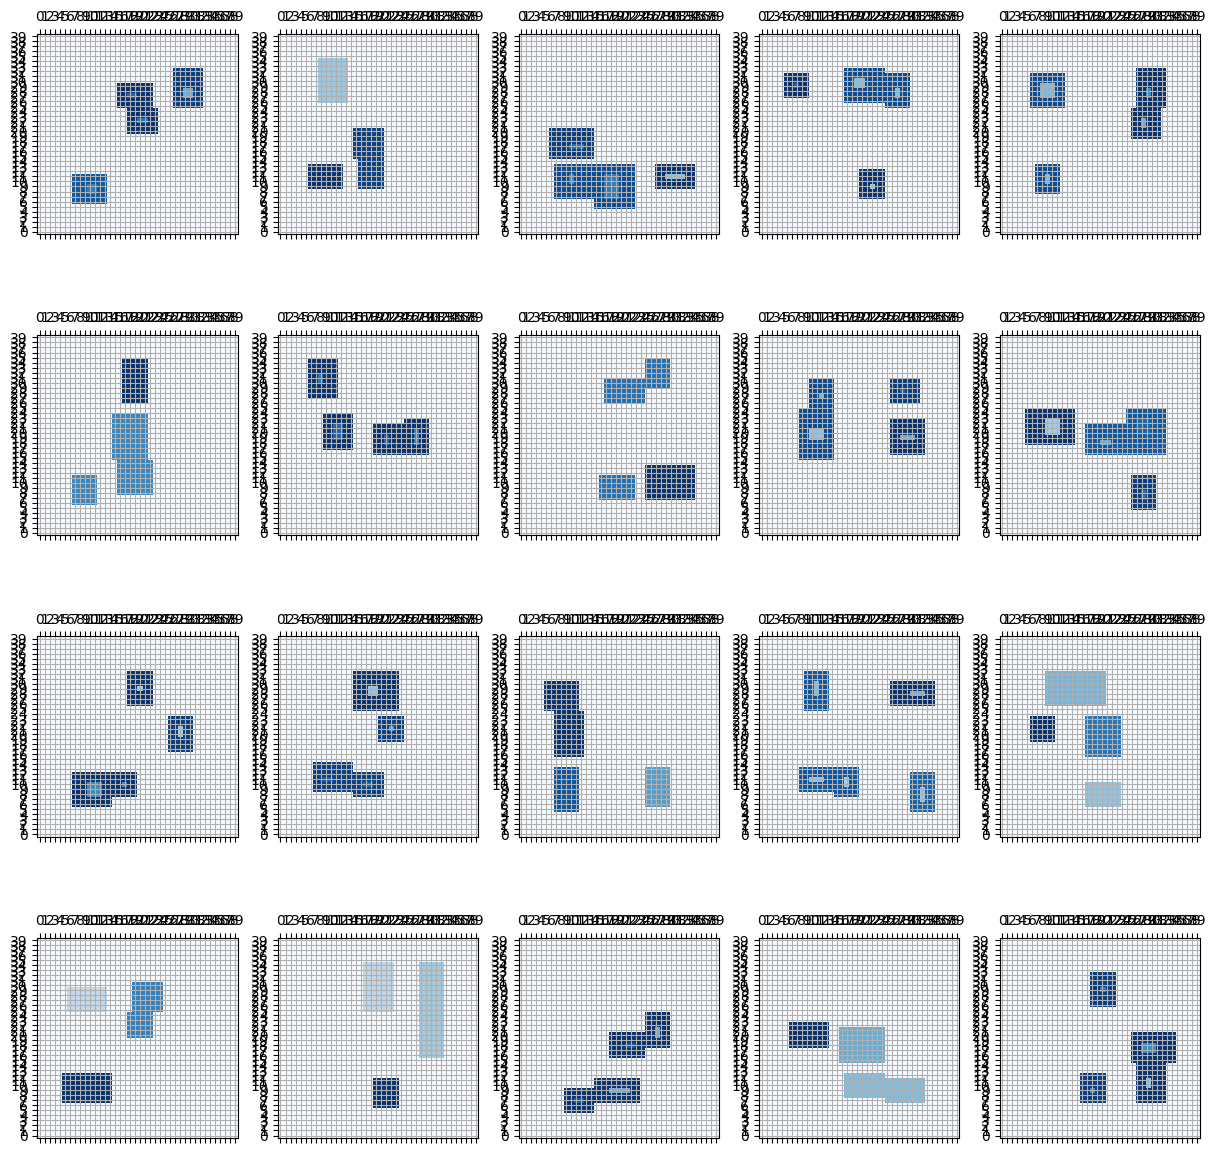

In [15]:
# visualise 20 random ground truth files in a grid

fig, axs = plt.subplots(4, 5, figsize=(15, 15))
for i in range(20):
    matrix = np.loadtxt(all_files[random.randint(0, len(all_files)-1)], usecols=range(40))
    axs[i//5, i%5].matshow(matrix, cmap=plt.cm.Blues, origin='lower')
    axs[i//5, i%5].set_xticks(np.arange(0, 40, 1));
    axs[i//5, i%5].set_yticks(np.arange(0, 40, 1));
    axs[i//5, i%5].grid()
plt.show()



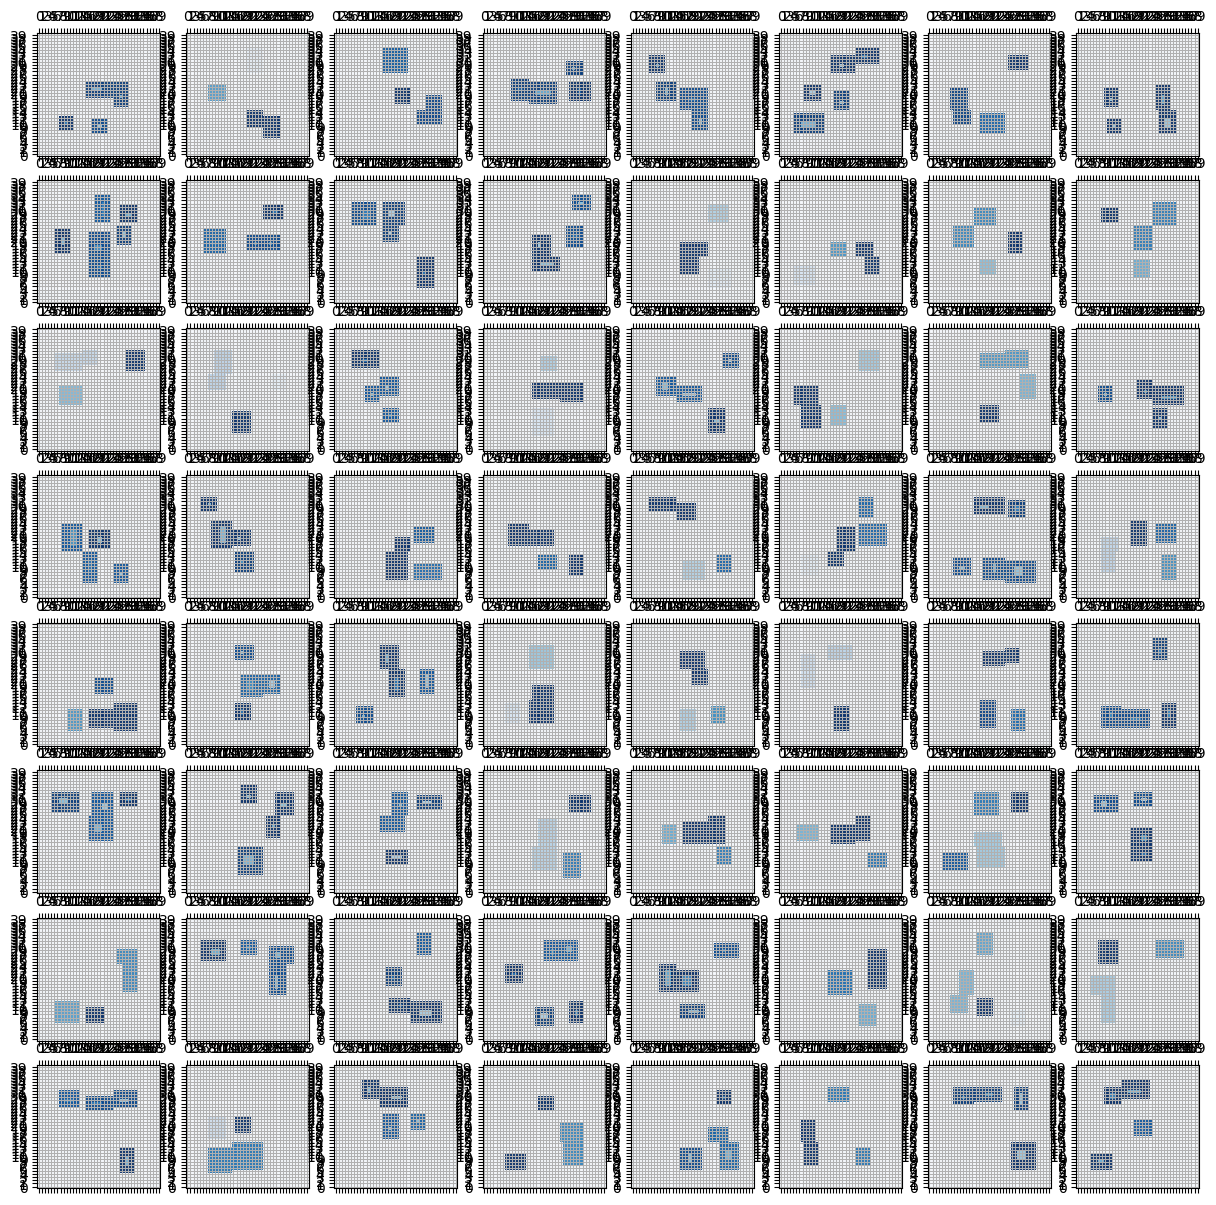

In [16]:
# visualise 64 random ground truth files in a grid

fig, axs = plt.subplots(8, 8, figsize=(15, 15))
for i in range(64):
    matrix = np.loadtxt(all_files[random.randint(0, len(all_files)-1)], usecols=range(40))
    axs[i//8, i%8].matshow(matrix, cmap=plt.cm.Blues, origin='lower')
    axs[i//8, i%8].set_xticks(np.arange(0, 40, 1));
    axs[i//8, i%8].set_yticks(np.arange(0, 40, 1));
    axs[i//8, i%8].grid()
plt.show()

In [17]:
# get counts of values in ground truth files
for idx, filename in enumerate(all_files):
    values, counts = np.unique(np.loadtxt(filename, usecols=range(40)), return_counts=True)
    print(values, counts)
    if idx == 10:
        break

[ 0.  9. 12. 13. 14.] [1363   42   35   42  118]
[ 0.  7. 14. 17. 18. 19.] [1428    1   12   81   40   38]
[ 0.  7.  9. 10. 15. 17. 18. 21.] [1422    1    2    2    3   28   89   53]
[ 0.  9. 14.] [1450  120   30]
[ 0.  8. 13. 14. 20. 21.] [1401   13    2    1  120   63]
[ 0.  6. 15.] [1427   30  143]
[ 0.  5.  8. 11.] [1438   40   80   42]
[ 0.  7. 13. 15. 17. 20.] [1455    3    1    3  109   29]
[ 0. 10. 14. 15. 18. 19. 21.] [1425    5    2    5   32   91   40]
[ 0.  5.  9. 13.] [1443   25   84   48]
[ 0.  8. 13. 14. 19. 20.] [1464    2    4    3   66   61]


In [18]:
# get number of ground truth files that only contain 0s

count = 0
for idx, filename in enumerate(all_files):
    values, counts = np.unique(np.loadtxt(filename, usecols=range(40)), return_counts=True)
    if len(values) == 1 and values[0] == 0:
        count += 1

print(count)

0


In [22]:
# get sum of counts of values in ground truth files

global_value_counts = {}

for idx, filename in enumerate(all_files):
    file_values, file_counts = np.unique(np.loadtxt(filename, usecols=range(40)), return_counts=True)

    for value_count_idx in range(len(file_values)):

        value = file_values[value_count_idx]
        count = file_counts[value_count_idx]

        if value not in global_value_counts:
            global_value_counts[value] = count
        else:
            global_value_counts[value] += count

AttributeError: 'dict' object has no attribute 'sorted'

In [24]:
# global_value_counts = global_value_counts.sort()

for value, count in sorted(global_value_counts.items()):
    print(value, count)

0.0 21343461
1.0 78266
2.0 80804
3.0 79498
4.0 86564
5.0 82025
6.0 83331
7.0 94372
8.0 92507
9.0 90844
10.0 92093
11.0 81152
12.0 84125
13.0 99313
14.0 95843
15.0 98718
16.0 95759
17.0 245083
18.0 257572
19.0 252841
20.0 242900
21.0 242929
